# Exercises week 38

## September 15-19

## Resampling and the Bias-Variance Trade-off


### Learning goals

After completing these exercises, you will know how to

- Derive expectation and variances values related to linear regression
- Compute expectation and variances values related to linear regression
- Compute and evaluate the trade-off between bias and variance of a model

### Deliverables

Complete the following exercises while working in a jupyter notebook. Then, in canvas, include

- The jupyter notebook with the exercises completed
- An exported PDF of the notebook (https://code.visualstudio.com/docs/datascience/jupyter-notebooks#_export-your-jupyter-notebook)


## Use the books!

This week deals with various mean values and variances in linear regression methods (here it may be useful to look up chapter 3, equation (3.8) of [Trevor Hastie, Robert Tibshirani, Jerome H. Friedman, The Elements of Statistical Learning, Springer](https://www.springer.com/gp/book/9780387848570)).

For more discussions on Ridge regression and calculation of expectation values, [Wessel van Wieringen's](https://arxiv.org/abs/1509.09169) article is highly recommended.

The exercises this week are also a part of project 1 and can be reused in the theory part of the project.

### Definitions

We assume that there exists a continuous function $f(\boldsymbol{x})$ and a normal distributed error $\boldsymbol{\varepsilon}\sim N(0, \sigma^2)$ which describes our data


$$
\boldsymbol{y} = f(\boldsymbol{x})+\boldsymbol{\varepsilon}
$$


We further assume that this continous function can be modeled with a linear model $\mathbf{\tilde{y}}$ of some features $\mathbf{X}$.


$$
\boldsymbol{y} = \boldsymbol{\tilde{y}} + \boldsymbol{\varepsilon} = \boldsymbol{X}\boldsymbol{\beta} +\boldsymbol{\varepsilon}
$$


We therefore get that our data $\boldsymbol{y}$ has an expectation value $\boldsymbol{X}\boldsymbol{\beta}$ and variance $\sigma^2$, that is $\boldsymbol{y}$ follows a normal distribution with mean value $\boldsymbol{X}\boldsymbol{\beta}$ and variance $\sigma^2$.


## Exercise 1: Expectation values for ordinary least squares expressions


**a)** With the expressions for the optimal parameters $\boldsymbol{\hat{\beta}_{OLS}}$ show that


$$
\mathbb{E}(\boldsymbol{\hat{\beta}_{OLS}}) = \boldsymbol{\beta}.
$$


### Answer:

$$
\hat\beta_{OLS} = (X^TX)^{-1}X^Ty
$$

$$
\hat\beta_{OLS} = (X^TX)^{-1}X^T(X\beta+\epsilon)
$$

$$
\hat\beta_{OLS}={X^TX}^{-1}X^TX\beta+{X^TX}^{-1}X^T\epsilon
$$

We have that $(X^TX)^{-1}X^TX=I$ 
$$
\hat\beta_{OLS}=I\beta+(X^TX)^{-1}X^T\epsilon
$$

$$
\mathbb{E}[\hat\beta_{OLS}] = \mathbb{E}[\beta]+\mathbb{E}[(X^TX)^{-1}X^T\epsilon]
$$

We have the assmumption that $(X^TX)^{-1}X^T$ and $\epsilon$ are independant so we have that $\mathbb{E}[(X^TX)^{-1}X^T\epsilon]=\mathbb{E}[(X^TX)^{-1}X^T]\mathbb{E}[\epsilon]$

$$
\mathbb{E}[\hat\beta_{OLS}] = \mathbb{E}[\beta]+\mathbb{E}[(X^TX)^{-1}x^T]\mathbb{E}[\epsilon]
$$

We have $\epsilon \sim N(0,\sigma^2)$ so $\mathbb{E}[\epsilon] = 0$  

$$
\mathbb{E}[\hat\beta_{OLS}]=\mathbb{E}[\beta]
$$

$$

$$

**b)** Show that the variance of $\boldsymbol{\hat{\beta}_{OLS}}$ is


$$
\mathbf{Var}(\boldsymbol{\hat{\beta}_{OLS}}) = \sigma^2 \, (\mathbf{X}^{T} \mathbf{X})^{-1}.
$$


### Answer:

We start from the expression gotten in Exercise 1a.

$$
\hat\beta_{OLS}=\beta+(X^TX)^{-1}X^T\epsilon
$$

$$
Var[\hat\beta_{OLS}] = Var[\beta] + Var[(X^TX)^{-1}X^T\epsilon]
$$


We have that $\beta$ is a constant so $Var[\beta] = 0$

$$
Var[\hat\beta_{OLS}] = Var[(X^TX)^{-1}X^T\epsilon]
$$

We have the formula $Var[A\epsilon] = AVar[\epsilon]A^T$, since $Var[\epsilon]$ is a constant we also have that: 

$$
Var[A\epsilon]=AA^TVar(\epsilon)
$$

In this case $A=(X^TX)^{-1}X^T$, so $AA^T=(X^TX)^{-1}(X^TX)(X^TX)^{-1}={X^TX}^{-1}I$

We then put it into the formula
$$
Var[A\epsilon]=(X^TX)^{-1}Var[\epsilon]
$$

We have that $Var[\epsilon]=\sigma^2$ as $\epsilon\sim N(0,\sigma^2)$

$$
Var[\hat\beta_{OLS}]=(X^TX)^{-1}\sigma^2
$$

We can use the last expression when we define a [confidence interval](https://en.wikipedia.org/wiki/Confidence_interval) for the parameters $\boldsymbol{\hat{\beta}_{OLS}}$.
A given parameter ${\boldsymbol{\hat{\beta}_{OLS}}}_j$ is given by the diagonal matrix element of the above matrix.


## Exercise 2: Expectation values for Ridge regression


**a)** With the expressions for the optimal parameters $\boldsymbol{\hat{\beta}_{Ridge}}$ show that


$$
\mathbb{E} \big[ \hat{\boldsymbol{\beta}}^{\mathrm{Ridge}} \big]=(\mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I}_{pp})^{-1} (\mathbf{X}^{\top} \mathbf{X})\boldsymbol{\beta}
$$


### Answer:

We have from earlier weeks that $\hat\beta^{Ridge}=(X^TX+\lambda I_{pp})^{-1}X^Ty$

$$
\hat\beta^{Ridge} = (X^TX+\lambda I_{pp})^{-1}X^T(X\beta+\epsilon)
$$

$$
\hat\beta^{Ridge}=(X^TX+\lambda I_{pp})^{-1}X^TX\beta+(X^TX+\lambda I_{pp})^{-1}X^T\epsilon
$$

We now take the expectation of $\mathbb{E}[\hat\beta^{Ridge}]$

$$
\mathbb{E}[\hat\beta^{Ridge}]=\mathbb{E}[(X^TX+\lambda I_{pp})^{-1}X^TX\beta] + \mathbb{E}[(X^TX+\lambda I_{pp})^{-1}X^T\epsilon]
$$

Here we use the same assumption as in exercise 1 that $\mathbb{E}[(X^TX+\lambda I_{pp})^{-1}X^T\epsilon]= \mathbb{E}[(X^TX+\lambda I_{pp})^{-1}X^T]\mathbb{E}[\epsilon]$ As the prior only depends on the training data. And the noise is not dependant on prior.
We then get.

$$
\mathbb{E}[\hat\beta^{Ridge}]=\mathbb{E}[(X^TX+\lambda I_{pp})^{-1}X^TX\beta]=(X^TX+\lambda I_{pp})^{-1}(X^TX)\beta
$$

We see that $\mathbb{E} \big[ \hat{\boldsymbol{\beta}}^{\mathrm{Ridge}} \big] \not= \mathbb{E} \big[\hat{\boldsymbol{\beta}}^{\mathrm{OLS}}\big ]$ for any $\lambda > 0$.


**b)** Show that the variance is


$$
\mathbf{Var}[\hat{\boldsymbol{\beta}}^{\mathrm{Ridge}}]=\sigma^2[  \mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I} ]^{-1}  \mathbf{X}^{T}\mathbf{X} \{ [  \mathbf{X}^{\top} \mathbf{X} + \lambda \mathbf{I} ]^{-1}\}^{T}
$$


### Answer:

We use our result from exercise 2b as a starting point:

$$
\hat\beta^{Ridge}=(X^TX+\lambda I_{pp})^{-1}X^TX\beta+(X^TX+\lambda I_{pp})^{-1}X^T\epsilon
$$

$$
Var[\hat\beta^{Ridge}]= Var[(X^TX+\lambda I_{pp})^{-1}X^TX\beta] + Var[(X^TX+\lambda I_pp)^{-1}X^T\epsilon]
$$

We can see that our entire first term is a constant and the variance of a constant is 0

$$
Var[\hat\beta^{Ridge}]=Var[(X^TX+\lambda I_{pp})^{-1}X^T\epsilon]
$$

We have the formula $Var[A\epsilon] = AVar[\epsilon]A^T$, since $Var[\epsilon]$ is a constant we also have that: 

$$
Var[A\epsilon]=AA^TVar(\epsilon)
$$

In this case $A=(X^TX+\lambda I_{pp})^{-1}X^T$

$$
AA^T=(X^TX+\lambda I_{pp})^{-1}X^TX\{(X^TX+\lambda I_{pp})^{-1}\}^T
$$

We have that $Var[\epsilon]=\sigma^2$ as $\epsilon\sim N(0,\sigma^2)$

We put everything together:

$$
Var[\hat\beta^{Ridge}] = \sigma^2(X^TX+\lambda I_{pp})^{-1}X^TX\{(X^TX+\lambda I_{pp})^{-1}\}^T
$$

We see that if the parameter $\lambda$ goes to infinity then the variance of the Ridge parameters $\boldsymbol{\beta}$ goes to zero.


## Exercise 3: Deriving the expression for the Bias-Variance Trade-off


The aim of this exercise is to derive the equations for the bias-variance tradeoff to be used in project 1.

The parameters $\boldsymbol{\hat{\beta}_{OLS}}$ are found by optimizing the mean squared error via the so-called cost function


$$
C(\boldsymbol{X},\boldsymbol{\beta}) =\frac{1}{n}\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2=\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]
$$


**a)** Show that you can rewrite this into an expression which contains

- the variance of the model (the variance term)
- the expected deviation of the mean of the model from the true data (the bias term)
- the variance of the noise

In other words, show that:


$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathrm{Bias}[\tilde{y}]+\mathrm{var}[\tilde{y}]+\sigma^2,
$$


with


$$
\mathrm{Bias}[\tilde{y}]=\mathbb{E}\left[\left(\boldsymbol{y}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right],
$$


and


$$
\mathrm{var}[\tilde{y}]=\mathbb{E}\left[\left(\tilde{\boldsymbol{y}}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right]=\frac{1}{n}\sum_i(\tilde{y}_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2.
$$

In order to arrive at the equation for the bias, we have to approximate the unknown function $f$ with the output/target values $y$.


### Answer:

We start with the expression

$$
\mathbb{E}[(y-\tilde y)^2]
$$

$$
=\mathbb{E}[(f(x)+\epsilon-\tilde y)^2]
$$

$$
= \mathbb{E}[(f(x)-\tilde y)^2+2(f(x)-\tilde y)\epsilon+\epsilon^2]
$$

$$
= \mathbb{E}[(f(x)-\tilde y)^2] + 2\mathbb{E}[\epsilon]\mathbb{E}[f(x)-\tilde y]+\mathbb{E}[\epsilon^2]
$$

We get that $\mathbb{E}[\epsilon]=0$ and that $\mathbb{E}[\epsilon^2]=\sigma^2$

$$
= \mathbb{E}[(f(x)-\tilde y)^2] + 0+ \sigma^2
$$

$$
=\mathbb{E}[(f(x)-\mathbb{E}[\tilde y]+\mathbb{E}[\tilde y]-\tilde y)^2] + \sigma^2
$$

$$
= \mathbb{E}[\{(f(x)-\mathbb{E}[\tilde y]\}+\{\mathbb{E}[\tilde y]-\tilde y\})^2] + \sigma^2
$$


$$
= \mathbb{E}(f(x)-\mathbb{E}[\tilde y])^2+2\mathbb{E}[(f(x)-\mathbb{E}[\tilde y])(\mathbb{E}[\tilde y]-\tilde y)]+\mathbb{E}(\mathbb{E}[\tilde y]-\tilde y)^2 + \sigma^2
$$

$$
= \mathbb{E}(f(x)-\mathbb{E}[\tilde y])^2+2\mathbb{E}[(f(x)-\mathbb{E}[\tilde y])\mathbb{E}(\mathbb{E}[\tilde y]-\tilde y)]+\mathbb{E}(\mathbb{E}[\tilde y]-\tilde y)^2 + \sigma^2
$$

$$
= \mathbb{E}(f(x)-\mathbb{E}[\tilde y])^2+2\mathbb{E}(f(x)-\mathbb{E}[\tilde y])(\mathbb{E}(\mathbb{E}[\tilde y])-\mathbb{E}(\tilde y))+\mathbb{E}(\mathbb{E}[\tilde y]-\tilde y)^2 + \sigma^2
$$

$$
= \mathbb{E}(f(x)-\mathbb{E}[\tilde y])^2+2\mathbb{E}(f(x)-\mathbb{E}[\tilde y])(0)+\mathbb{E}(\mathbb{E}[\tilde y]-\tilde y)^2 + \sigma^2
$$

$$
= \mathbb{E}(f(x)-\mathbb{E}[\tilde y])^2+\mathbb{E}[(\mathbb{E}[\tilde y]-\tilde y)^2] + \sigma^2
$$

$$
=\mathrm{Bias}[\tilde{y}]+\mathrm{var}[\tilde{y}]+\sigma^2,
$$


**b)** Explain what the terms mean and discuss their interpretations.


The Bias term explains how far the average model prediction is from the true function f(x) that explains the data distribution.display_pretty. High bias means that the model is far from the true function. The function is underfitting tha data.

Variance measures how much the predicitons vary if you retrain from different data. High variance means that the model variances alot based on training data. And usually means overfitting to training data.

while $\sigma^2$ is simply the noise, which cannot be removed. Also called the ireducable error.

## Exercise 4: Computing the Bias and Variance


Before you compute the bias and variance of a real model for different complexities, let's for now assume that you have sampled predictions and targets for a single model complexity using bootstrap resampling.

**a)** Using the expression above, compute the mean squared error, bias and variance of the given data. Check that the sum of the bias and variance correctly gives (approximately) the mean squared error.


In [1]:
import numpy as np

n = 100
bootstraps = 1000

predictions = np.random.rand(bootstraps, n) * 10 + 10
# The definition of targets has been updated, and was wrong earlier in the week.
targets = np.random.rand(1, n)

mean_pred = predictions.mean(axis=0)

mse = ((predictions-targets)**2).mean()
bias = ((targets-mean_pred)**2).mean()
variance = ((predictions**2).mean(axis=0)-mean_pred**2).mean()

print("mse is:",mse)
print("bias is",bias)
print("variance is",variance)

mse is: 219.29721504049846
bias is 210.9776971185759
variance is 8.31951792192259


**b)** Change the prediction values in some way to increase the bias while decreasing the variance.

In [2]:
import numpy as np

n = 100
bootstraps = 1000

predictions = np.random.rand(bootstraps, n) * 0.1 + 100 # changes the + term to be higher which makes the bias huge
# and changes the 10 to 0.1 which made the variance very small 
# I dont really understand if this is what the task wants us to do 
targets = np.random.rand(1, n)

mean_pred = predictions.mean(axis=0)

mse = ((predictions-targets)**2).mean()
bias = ((targets-mean_pred)**2).mean()
variance = ((predictions**2).mean(axis=0)-mean_pred**2).mean()

print("mse is:",mse)
print("bias is",bias)
print("variance is",variance)

mse is: 9904.255973787924
bias is 9904.255138407118
variance is 0.0008353808062929602


**c)** Change the prediction values in some way to increase the variance while decreasing the bias.


In [3]:
import numpy as np

n = 100
bootstraps = 1000

predictions = np.random.rand(bootstraps, n) * 20 + 0.1 # Here we did the same as the previous task, but did it with the other terms
targets = np.random.rand(1, n)

mean_pred = predictions.mean(axis=0)

mse = ((predictions-targets)**2).mean()
bias = ((targets-mean_pred)**2).mean()
variance = ((predictions**2).mean(axis=0)-mean_pred**2).mean()

print("mse is:",mse)
print("bias is",bias)
print("variance is",variance)

mse is: 124.88014067015601
bias is 91.48829956916163
variance is 33.39184110099438


**d)** Perform a bias-variance analysis of a polynomial OLS model fit to a one-dimensional function by computing and plotting the bias and variances values as a function of the polynomial degree of your model.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import (
    PolynomialFeatures,
)  # use the fit_transform method of the created object!
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [5]:
def polynomial_features(x, p, intercept=False):
    n = len(x)
    if intercept:
        X = np.ones((n, p+1))   # include x^0 = 1
        for i in range(1, p+1):
            X[:, i] = x**i
    else:
        X = np.zeros((n, p))
        for i in range(p):
            X[:, i] = x**(i+1)
    return X

In [ ]:
n = 100
bootstraps = 1000

x = np.linspace(-5, 5, n)
y = np.exp(-(x**2)) + 1.5 * np.exp(-((x - 2) ** 2)) + np.random.normal(0, 0.1)
degree = 18

biases = []
variances = []
mses = []

for p in range(1, degree):

    X_all = x.reshape(-1,1)
    poly = PolynomialFeatures(degree=p, include_bias=True)
    X = poly.fit_transform(X_all) 

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

    predictions = np.empty((bootstraps,len(y_test)))
    targets = np.empty((bootstraps, len(y_test)))

    for b in range(bootstraps):
        X_train_re, y_train_re = resample(X_train, y_train)

        # fit your model on the sampled data
        model = LinearRegression(fit_intercept=False)
        model.fit(X_train_re, y_train_re)

        # make predictions on the test data
        predictions[b, :] = model.predict(X_test)
        targets[b, :] = y_test


    mean_pred = predictions.mean(axis=0)

    mse = ((predictions-targets)**2).mean()
    bias = ((targets-mean_pred)**2).mean()
    variance = ((predictions**2).mean(axis=0)-mean_pred**2).mean()

    biases.append(bias)
    variances.append(variance)
    mses.append(mse)

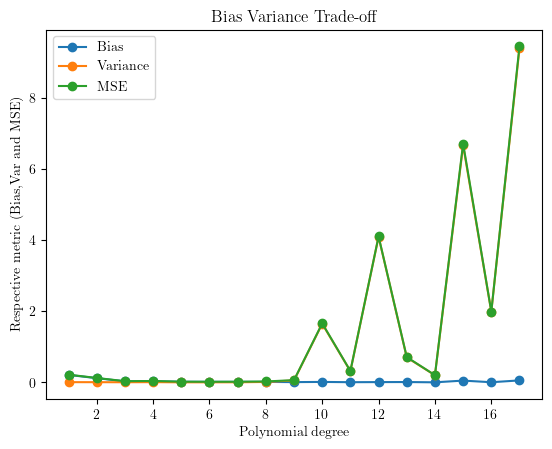

In [41]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})



plt.plot(range(1,degree),biases,marker="o",label="Bias")
plt.plot(range(1,degree),variances,marker="o",label="Variance")
plt.plot(range(1,degree),mses,marker="o",label="MSE")
plt.xlabel("Polynomial degree")
plt.ylabel("Respective metric (Bias,Var and MSE)")
plt.title("Bias Variance Trade-off")
plt.legend()
plt.savefig("/Users/bror/Downloads/figures_fys/biasVarTrade.pdf")
plt.show()


**e)** Discuss the bias-variance trade-off as function of your model complexity (the degree of the polynomial).

Bias seems to dominate variance and is a bigger portion of the MSE. We see that both the variance and bias decrease until we see a polynomial of 3 and then see it increases again. In this case Bias and variance seems to follow the same trends.

**f)** Compute and discuss the bias and variance as function of the number of data points (choose a suitable polynomial degree to show something interesting).


In [ ]:
n_grid = np.arange(20,200,20)  

biases = []
variances = []
mses = []

p = 3

for n in n_grid:
    # generate dataset of size n
    x = np.linspace(-3, 3, n)
    y = np.exp(-(x**2)) + 1.5 * np.exp(-((x - 2) ** 2))

    # polynomial features of fixed degree
    X_all = x.reshape(-1, 1)
    poly = PolynomialFeatures(degree=p, include_bias=True)
    X = poly.fit_transform(X_all)

    # split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

    # bootstrap predictions
    predictions = np.empty((bootstraps, len(y_test)))
    targets = np.empty((bootstraps, len(y_test)))

    for b in range(bootstraps):
        X_train_re, y_train_re = resample(X_train, y_train)
        model = LinearRegression(fit_intercept=False)
        model.fit(X_train_re, y_train_re)

        predictions[b, :] = model.predict(X_test)
        targets[b, :]     = y_test

    # bias^2, variance, mse (averaged over test samples)
    mean_pred = predictions.mean(axis=0)
    mse = ((predictions - targets) ** 2).mean()
    bias = ((targets - mean_pred) ** 2).mean()
    variance = ((predictions**2).mean(axis=0) - mean_pred**2).mean()

    biases.append(bias)
    variances.append(variance)
    mses.append(mse)

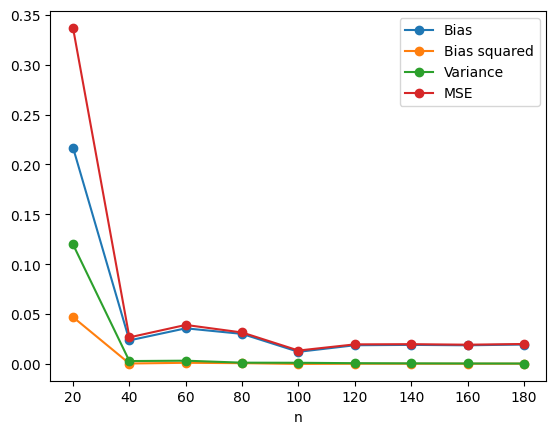

In [ ]:
plt.plot(n_grid,biases,marker="o",label="Bias")
plt.plot(n_grid,[i**2 for i in biases],marker="o",label="Bias squared")
plt.plot(n_grid,variances,marker="o",label="Variance")
plt.plot(n_grid,mses,marker="o",label="MSE")
plt.xlabel("n")
plt.legend()
plt.show()

We would naturally expect variance to decrease when n gets larger, which we can see in the plot. On the other hand one would think the bias would stay the same as we dont change p. But this is not what we see in the plot

## Exercise 5: Interpretation of scaling and metrics


In this course, we often ask you to scale data and compute various metrics. Although these practices are "standard" in the field, we will require you to demonstrate an understanding of _why_ you need to scale data and use these metrics. Both so that you can make better arguements about your results, and so that you will hopefully make fewer mistakes.

First, a few reminders: In this course you should always scale the columns of the feature matrix, and sometimes scale the target data, when it is worth the effort. By scaling, we mean subtracting the mean and dividing by the standard deviation, though there are many other ways to scale data. When scaling either the feature matrix or the target data, the intercept becomes a bit harder to implement and understand, so take care.

Briefly answer the following:

**a)** Why do we scale data?

**b)** Why does the OLS method give practically equivelent models on scaled and unscaled data?

**c)** Why does the Ridge method **not** give practically equivelent models on scaled and unscaled data? Why do we only consider the model on scaled data correct?

**d)** Why do we say that the Ridge method gives a biased model?

**e)** Is the MSE of the OLS method affected by scaling of the feature matrix? Is it affected by scaling of the target data?

**f)** Read about the R2 score, a metric we will ask you to use a lot later in the course. Is the R2 score of the OLS method affected by scaling of the feature matrix? Is it affected by scaling of the target data?

**g)** Give interpretations of the following R2 scores: 0, 0.5, 1.

**h)** What is an advantage of the R2 score over the MSE?


a)
We scale data because features that are scaled differently can dominate the solution of a regression. Scaling puts all features on the same numerical scale.

b)
OLS solves $(X^TX)^{-1}X^Ty$ scaling X just changes the coefficients. but the fitted predictions remain the same.

c)
Ridge penalixes the size of the coefficients $\lambda||\beta||^2$ if features have different scale, they also become penalizes differently.

d)
Ridge shrinks coefficients to zero. Which adds bias to the estimator the expected value of $\hat\beta$ differs from the true $\beta$

e)
Scaling the feature matrix doesnt change the MSE. But scaling the target data does. If we rescale y the MSE scales correspondily.

f)
R2 only depends on predictions versus true values. Since the OLS model is not affected by scaling neither is R2. Both RSS and TSS scale the same when scaling y so the R2 does not change.

g)
$R^2=0$, model does not predict the variance of y.
$R^2=0.5$ model explains 50% of the variance
$R^2=1$ model explains all the variance in y. In other words a perfect model

h)
R2 is scale indpendent. It directly tells you the variance of y explained by the model. MSE depends on the scaling of y.

